<a href="https://colab.research.google.com/github/gnitnaw/Programs/blob/master/Chapter6/smoothspline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python --version

Python 3.7.12


# Example 6.15
## Import modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from numpy.linalg import norm
print(np.__version__)

1.19.5


## Set random seed

In [3]:
np.random.seed(1357)

## Original Program

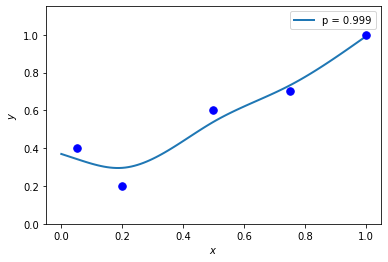

In [4]:
x = np.array([[0.05, 0.2, 0.5, 0.75, 1.]]).T
y = np.array([[0.4, 0.2, 0.6, 0.7, 1.]]).T

n = x.shape[0]
p = 0.999
ngamma = (1-p)/p

k = lambda x1, x2 : (1/2)* np.max((x1,x2)) * np.min((x1,x2)) ** 2 \
                           - ((1/6)* np.min((x1,x2))**3)
K = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        K[i,j] = k(x[i], x[j])

Q = np.hstack((np.ones((n,1)), x))
      
m1 = np.hstack((K @ K.T + (ngamma * K), K @ Q)) 
m2 = np.hstack((Q.T @ K.T, Q.T @ Q))
M = np.vstack((m1,m2))

c = np.vstack((K, Q.T)) @ y

ad = np.linalg.solve(M,c)

# plot the curve
xx = np.arange(0,1+0.01,0.01).reshape(-1,1)

g = np.zeros_like(xx)
Qx = np.hstack((np.ones_like(xx), xx))
g = np.zeros_like(xx)
N = np.shape(xx)[0]

Kx = np.zeros((n,N))
for i in range(n):
    for j in range(N):
        Kx[i,j] = k(x[i], xx[j])
            
g = g + np.hstack((Kx.T, Qx)) @ ad

plt.ylim((0,1.15))
plt.plot(xx, g, label = 'p = {}'.format(p), linewidth = 2)
plt.plot(x,y, 'b.', markersize=15)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()

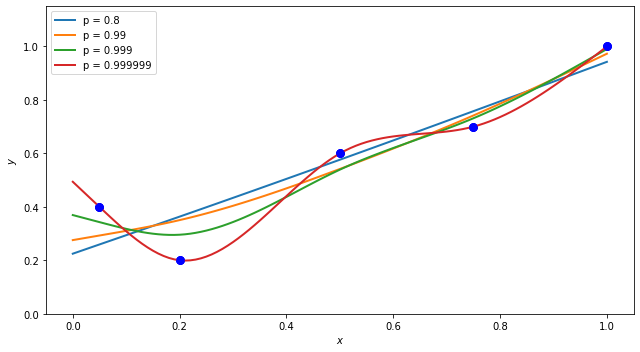

In [5]:
x = np.array([[0.05, 0.2, 0.5, 0.75, 1.]]).T
y = np.array([[0.4, 0.2, 0.6, 0.7, 1.]]).T

n = x.shape[0]

plt.clf()
p_vals = [0.8, 0.99, 0.999, 0.999999]
plt_params = ['-', '-', '-', '-']

k = lambda x1, x2 : (1/2)* np.max((x1,x2)) * np.min((x1,x2)) ** 2 - \
                            ((1/6)* np.min((x1,x2))**3)

for p, prm in zip(p_vals, plt_params): 
    ngamma = (1-p)/p
    
    K = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            K[i,j] = k(x[i], x[j])
    
    Q = np.hstack((np.ones((n,1)), x))
          
    m1 = np.hstack((K @ K.T + (ngamma * K), K @ Q)) 
    m2 = np.hstack((Q.T @ K.T, Q.T @ Q))
    M = np.vstack((m1,m2))
    
    c = np.vstack((K, Q.T)) @ y 
    ad = np.linalg.solve(M,c)
    
    # plot the curves
    xx = np.arange(0,1+0.01,0.01).reshape(-1,1)
    
    g = np.zeros_like(xx)
    Qx = np.hstack((np.ones_like(xx), xx))
    g = np.zeros_like(xx)
    N = np.shape(xx)[0]
    
    Kx = np.zeros((n,N))
    for i in range(n):
        for j in range(N):
            Kx[i,j] = k(x[i], xx[j])
                
    g = g + np.hstack((Kx.T, Qx)) @ ad
    plt.plot(xx, g, prm, label = 'p = {}'.format(p), linewidth = 2)
    plt.plot(x,y, 'b.', markersize=15)

plt.ylim((0,1.15))
plt.xlabel('$x$')
plt.ylabel('$y$')   
plt.gcf().set_size_inches(9,5)    
plt.tight_layout()
plt.legend()